#### Package and Dataset Import

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score,confusion_matrix,f1_score

df=pd.read_csv('iris.csv')
print(df.shape)
df.head()

(150, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# Unique categories of Irises
#print(df['iris'].unique())

"""
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Turning Iris Categories into integer values 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Iris-setosa     : 0

Iris-versicolor : 1

Iris-virginica  : 2

"""

df['category']=df['iris'].astype('category')
df['category']=df['category'].cat.codes
df.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,iris,category
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


In [33]:
column=df.columns
column=column.tolist()
column.remove('iris')
column.remove('category')

X=df[column]
Y=df['category']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=6)

In [45]:
model=LogisticRegression(solver='lbfgs',max_iter=200,random_state=6,multi_class='auto')
model.fit(x_train,y_train)

y_predict=model.predict(x_test)

coef=model.coef_.T  # What does the coefficient matrix mean here? 
coef_dat=pd.DataFrame(coef,index=column,columns=[df.iris.unique()])
coef_dat

,Iris-setosa,Iris-versicolor,Iris-virginica
Sepal Length,-0.408713,0.475372,-0.066659
Sepal Width,0.846550,-0.306614,-0.539936
Petal Length,-2.358827,-0.102805,2.461632
Petal Width,-1.027725,-0.931249,1.958973


Model Jaccard Score :  [1.         0.90909091 0.90909091]

Model F1 Score : [1.         0.95238095 0.95238095]


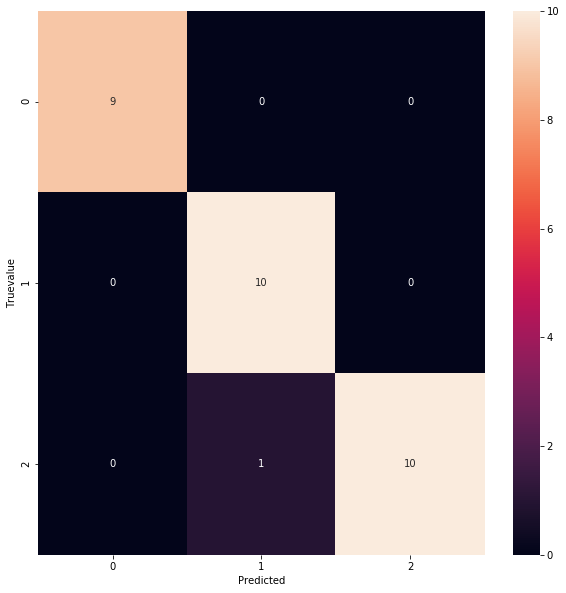

In [65]:
print('Model Jaccard Score : ',jaccard_score(y_test,y_predict,average=None))
print('\nModel F1 Score :',f1_score(y_test,y_predict,average=None))
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truevalue')
plt.show()